# FCC Magic Gamma Telescope

This report is a supervise machine learning project that aims to predict the classification of gamma and hadron particles based on the features provided in the dataset. The dataset contains 10 features and a target variable. The target variable is binary, with `g` representing gamma particles and `h` representing hadron particles.

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

Suppress warnings, specifically FutureWarning

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Preprocessing

In [3]:
dataset_url = "https://raw.githubusercontent.com/cogxen/datasets/main/fcc-magic/magic_04.data"
cols = ["fLegLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv(dataset_url, names=cols)
df.head()

fLegLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0     28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1     31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2    162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3     23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4     75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

### Data Cleaning
- Change the `class` column to binary values

In [4]:
df["class"] = df["class"].map({"g": 1, "h": 0})
df.head()

fLegLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0     28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1     31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2    162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3     23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4     75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

### Plot the data using histograms

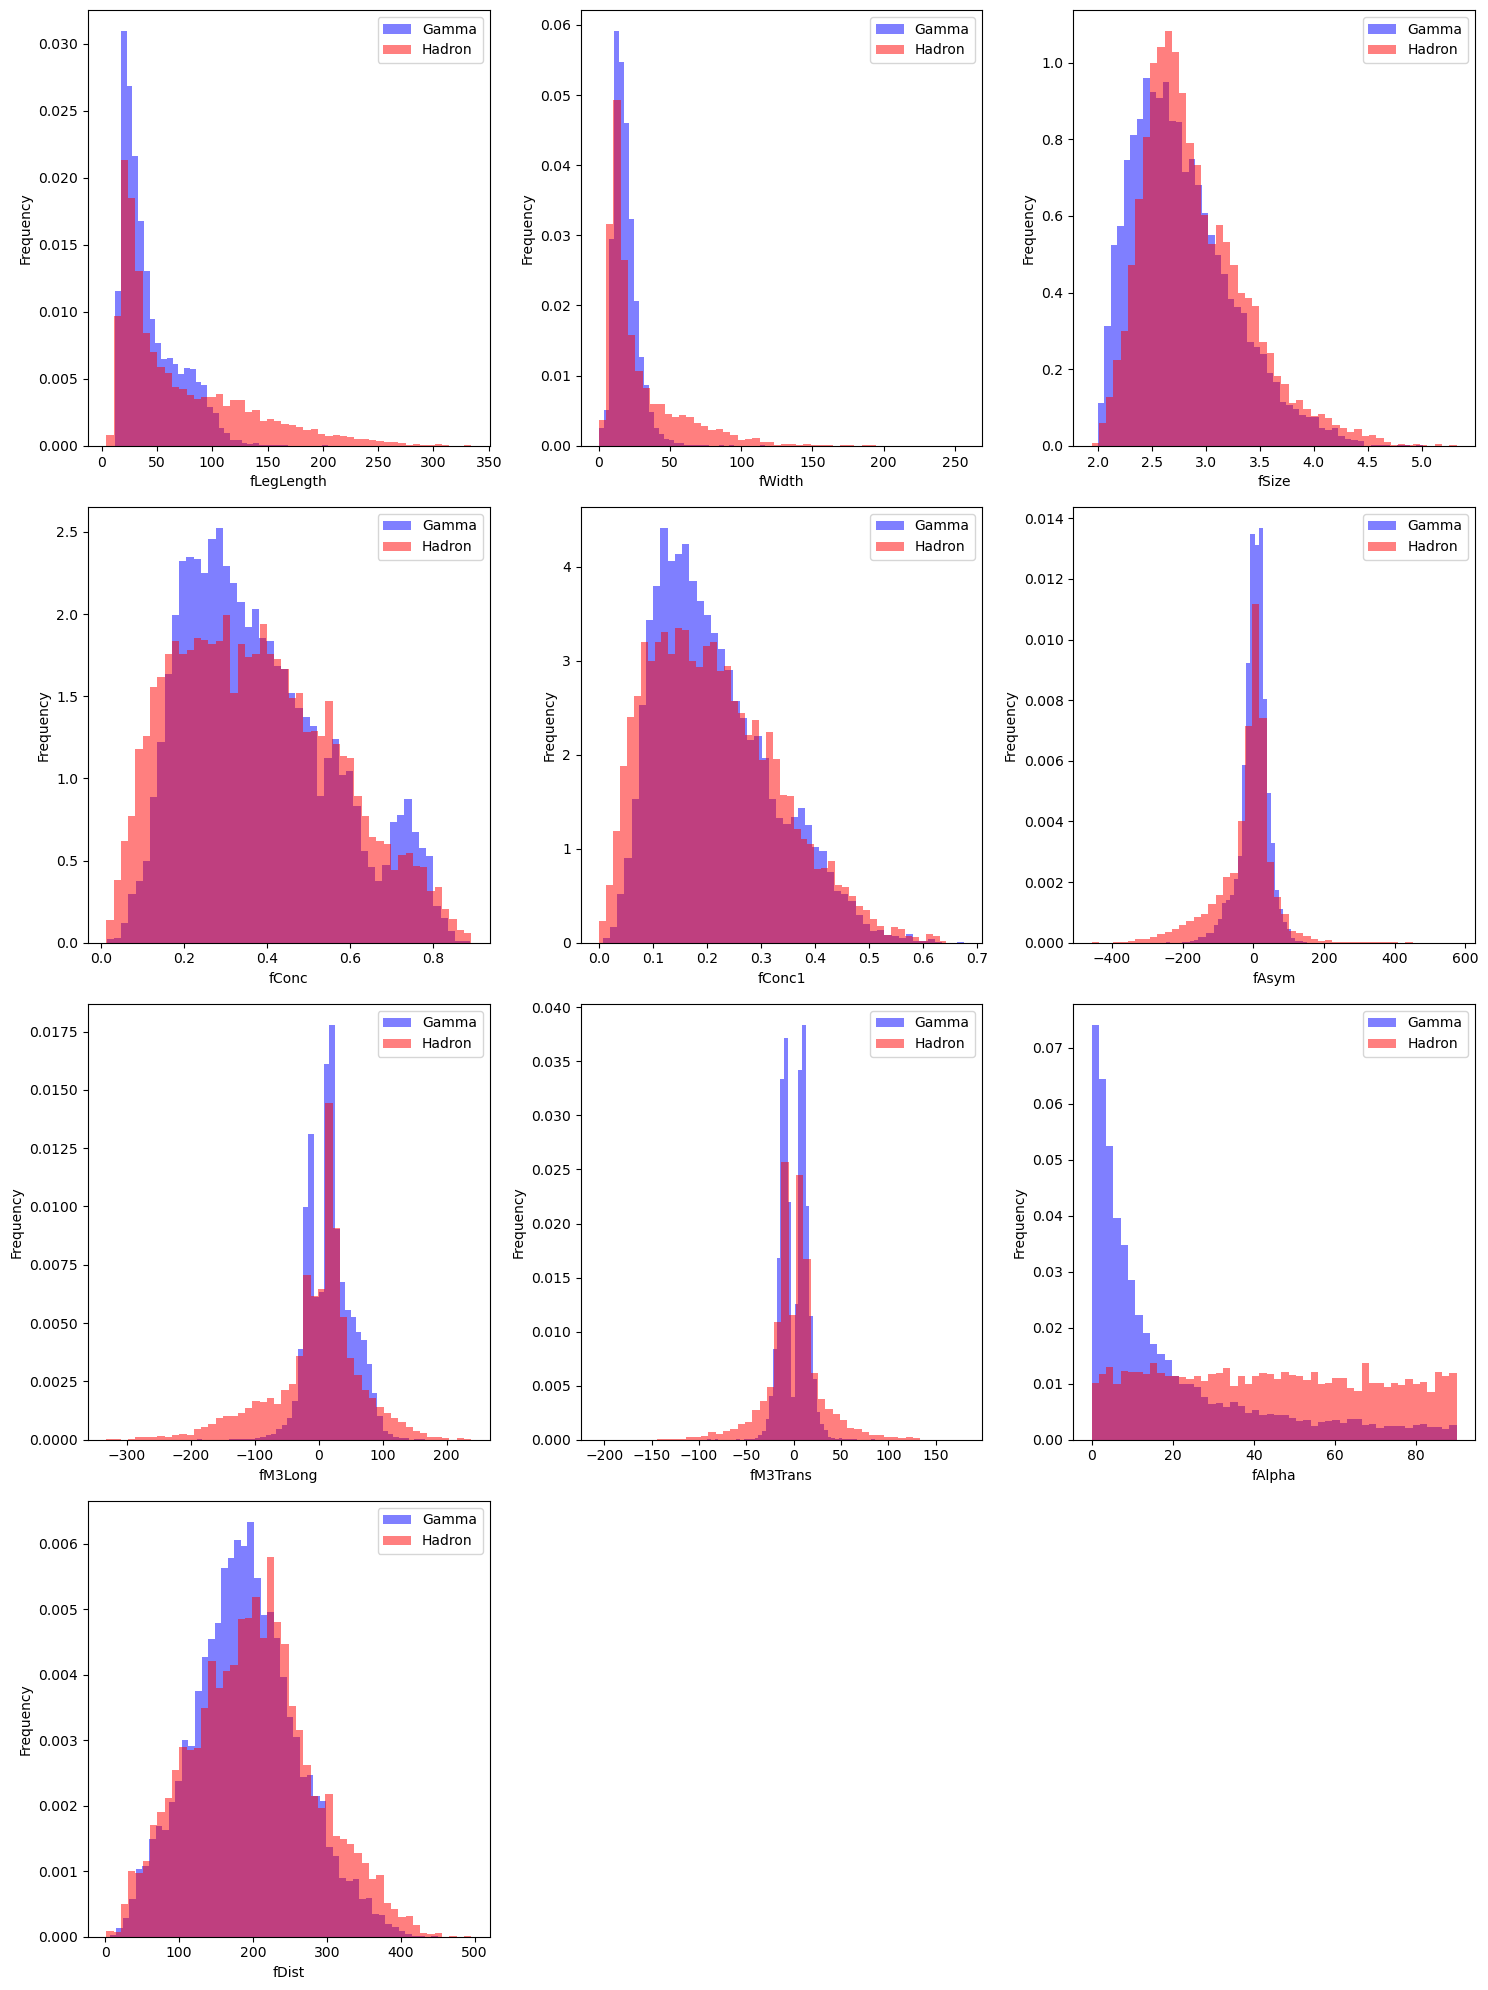

In [5]:
# Plot the data using histograms
num_cols = len(df.columns[:-1])
num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, label in enumerate(df.columns[:-1]):
    axes[i].hist(df[df["class"] == 1][label], bins=50, alpha=0.5, label="Gamma", color="blue", density=True)
    axes[i].hist(df[df["class"] == 0][label], bins=50, alpha=0.5, label="Hadron", color="red", density=True)
    axes[i].set_xlabel(label)
    axes[i].set_ylabel("Frequency")
    axes[i].legend()

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Train, Validation, and Test Datasets

In [6]:
train, validate, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

In [7]:
def scale_data(dataframe, over_sample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    
    if over_sample:
        ros = RandomOverSampler(sampling_strategy="minority")
        x, y = ros.fit_resample(x, y)
    
    data = np.hstack((x, np.reshape(y, (-1, 1))))
    
    return data, x, y

In [8]:
train, x_train, y_train = scale_data(train, over_sample=True)
validate, x_validate, y_validate = scale_data(validate, over_sample=False)
test, x_test, y_test = scale_data(test, over_sample=False)

## Classification Models

- K-Nearest Neighbors Classifier
- Naive Bayes Classifier
- Logistic Regression
- Support Vector Machine (SVM)
- Neural Network

We will use these classifiers to predict the classification of the particles and evaluate their performance using the classification report.

### K-Nearest Neighbors Classifier

In [9]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [10]:
y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.67      0.72      1334
           1       0.83      0.89      0.86      2470

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804


### Naive Bayes Classifier

In [11]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [12]:
y_pred = nb.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.41      0.51      1334
           1       0.74      0.90      0.81      2470

    accuracy                           0.73      3804
   macro avg       0.72      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804


### Logistic Regression

In [13]:
lg = LogisticRegression()
lg.fit(x_train, y_train)

LogisticRegression()

In [14]:
y_pred = lg.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1334
           1       0.85      0.82      0.84      2470

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804


### Support Vector Machine (SVM)

In [15]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [16]:
y_pred = svm.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1334
           1       0.89      0.90      0.90      2470

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804


### Neural Network